# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'train_vanilla_nn_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [4]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

FASHION-MNIST dataset missing - downloading...


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [5]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [13]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.mylayer = nn.Linear(input_size, output_size) # complete here
        
    def forward(self, x):
        
        x = self.mylayer(x)# complete here
        p = torch.softmax(x, dim=1)# complete here
        
        return p

### Build the net

In [14]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (mylayer): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

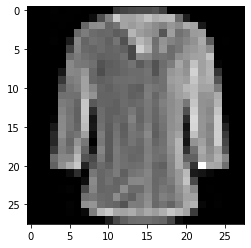

In [15]:
im= test_data[4]# complete here
utils.show(im)

### And feed it to the UNTRAINED network:

In [16]:
p = net(im.view(1,-1))# complete here
print(p)

tensor([[0.1235, 0.1056, 0.1040, 0.0929, 0.1301, 0.0836, 0.0945, 0.1017, 0.0827,
         0.0814]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

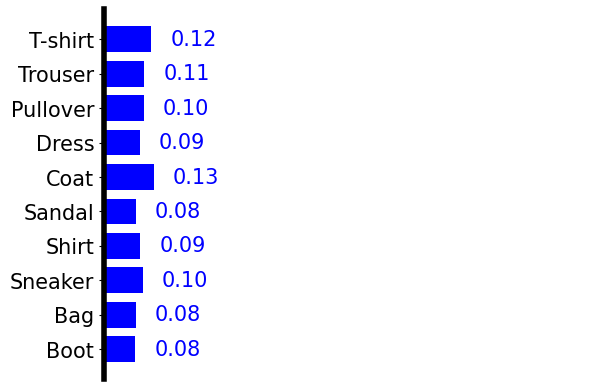

In [17]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [20]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network

    idx = randint(0, 60000-1)
    input = train_data[idx].view(1, -1)
    label = train_label[idx].view(1)
    # complete here
    # complete here


    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    prob = net(input) 
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

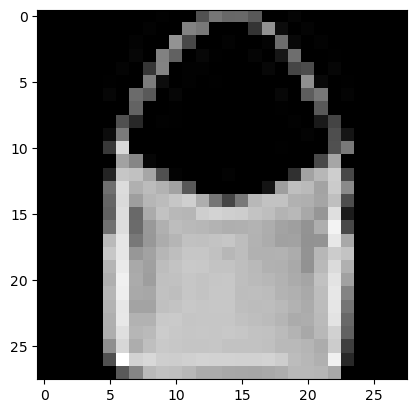

In [22]:
im= test_data[34]
utils.show(im)

### Feed it to the TRAINED net:

In [23]:
p = net(im.view(1,-1)) # complete here
print(p)

tensor([[1.2255e-04, 9.3779e-06, 6.5142e-02, 7.0174e-03, 9.8461e-04, 5.2184e-03,
         8.2921e-04, 1.0338e-04, 9.2038e-01, 1.9643e-04]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

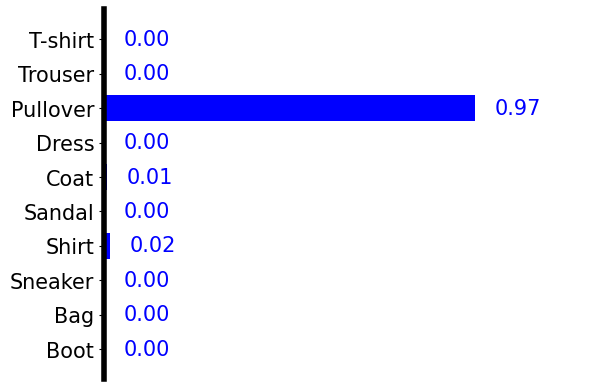

In [24]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

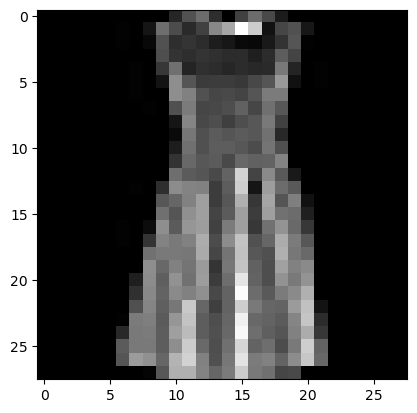

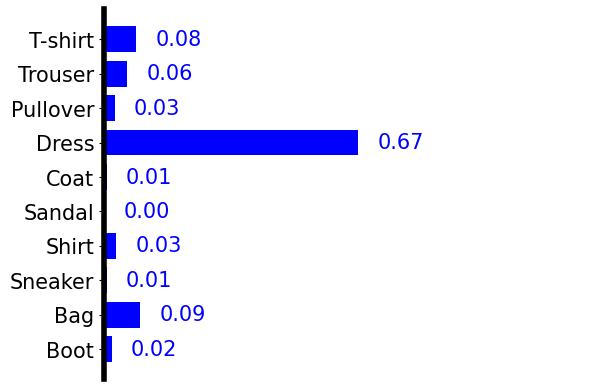

In [26]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)